# "Cats vs. Dogs - fastai lesson one"
> "Working through the first lesson of the fastai deep learning course"

- toc: true
- branch: master
- comments: true
- author: Chelsea Tucker
- categories: [jupyter]

<img src="images/2021-07-28-lessonone2.jpg">

# 1. Introduction

Below shows the workings and investigations that have come about from doing the first lesson of the [Fastai Deep Learning for Coders MOOC](https://course.fast.ai/videos/?lesson=1). As stated in my [first blog post](https://mathschelsea.github.io/Blogging/jupyter/2021/07/02/begin.html), this blog doesn't aim to impress, it's merely a documentation of a beginners journey into deep learning which may; or may not, help others in the future.

# 2. Cats & Dogs Vision Tutorial

## 2.1 Vision Tutorial - *from_name_func*

I started the first Fastai Deep Learning for Coders lesson about a week before I actually ran the first box of code, error-free. This was due 'ImageDataLoaders' not working which boiled down to my pillow package version not being compatible with other packages (I downgraded to pillow 8.2.0). Whilst I was losing hope with my pillow issues I came across the 'Tutorials' section on the [Fastai Docs](https://docs.fast.ai/tutorial.html) site. I had been told about these in the past but forgot about them in my quest to get my AWS notebook instance working ([link here on how I did this](https://mathschelsea.github.io/Blogging/jupyter/2021/07/12/setup.html)). Looking through the tutorials I decided that I would use them in conjunction with the lessons as they seemed pretty decent. In particular, I like the more incremental breakdown of the code. Therefore, I will start this first lesson with going through the Vision tutorial and playing around with a few things.

In [47]:
# Import libraries and download the dataset
from fastai.vision.all import *
path = untar_data(URLs.PETS)

# Let's see what is inside this path
print("Path:", path)
print("Path contents:", path.ls())

Path: /home/ec2-user/.fastai/data/oxford-iiit-pet
Path contents: [Path('/home/ec2-user/.fastai/data/oxford-iiit-pet/images'), Path('/home/ec2-user/.fastai/data/oxford-iiit-pet/annotations')]


I'm only interested in the 'images' folder for now. I'll use the *get_image_files* function to grab all of the image files (recursively) from the folder and put them in the 'files' variable. 

In [48]:
files = get_image_files(path/'images')
print("Number of objects in 'files' variable:",len(files))
print("First file:",files[0]) 
print("Third file:",files[2])

Number of objects in 'files' variable: 7390
First file: /home/ec2-user/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_96.jpg
Third file: /home/ec2-user/.fastai/data/oxford-iiit-pet/images/Russian_Blue_160.jpg


There are 7,390 objects in the 'files' variable. For the minute they are locations of files. In order to view the actual images we must use the *PILimage.create* function.

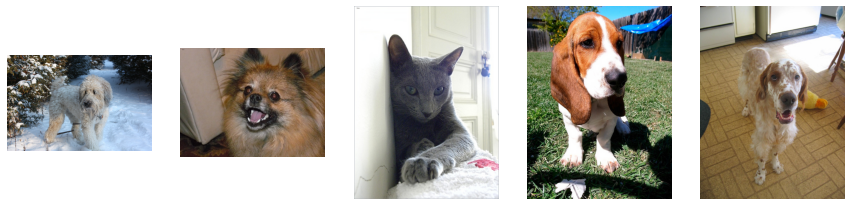

In [148]:
import matplotlib.pyplot as plt
n = [0,1,2,3,4]

r = 1 # Number of rows
c = 5 # Number of columns
s = 1 # Subplot counter

fig = plt.figure(figsize=(15,15))

for i in n:
    plt.subplot(r,c,s)
    plt.imshow(PILImage.create(files[i]))
    plt.axis('off')
    s = s+1

In order to build a supervised model from these images we need labels. The file names are labels, they state what bread the animal is in the image. The file names also state whether the image is of a dog or cat based on the first letter in the file name. If the first letter of the file name is a capital then that image is of a cat. Let's define a label function based on the first letter of the image name:

Below is an image of a cat, T/F?: False


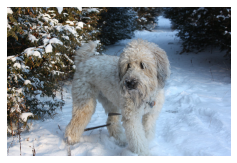

In [175]:
# label function:
def label_func(f): return f[0].isupper()

im = PILImage.create(files[0])
im.show(figsize=(4,4))
print("Below is an image of a cat, T/F?:",label_func(files[0].name))

In order to get the images ready for a model, they need to be put into a DataLoaders object.

In [17]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

The following is happening in the above section of code:

1. Telling the function the directory I'm working in;
2. The files that I've grabbed from that directory;
3. The function that defines the labels; and
4. Stated the transformation I want to apply (resize all images to 224x224 pixels).

Note that the function 'from_name_func' is just an extention of the 'from_path_func'. I'll show this later on. Also note that there are a number of additional arguments. From the documents:

```python
ImageDataLoaders.from_name_func(path, fnames, label_func, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, bs=64, val_bs=None, shuffle=True, device=None)
```

The data is randomly split into training and validation sets based on the *valid_pct* input (with the option to seed the outcome). Any error or performance metrics will be calculated on the validation dataset. The validation data is a random subset of *valid_pct* based on *val_bs* which is the validation batch size. If *val_bs* isn't provided then *bs* is used by default. Similarly, the training data is a random subset based on *bs* which defaults to 64. 

In [155]:
# collapse_hide
print("Training data batch size:", dls.train.bs)
print("Validation data batch size:", dls.train.bs)
print("Dependent variable unique level names:", dls.vocab)
print("Dependent variable number of unique level names:", dls.c)

Training data batch size: 64
Validation data batch size: 64
Dependent variable unique level names: [False, True]
Dependent variable number of unique level names: 2


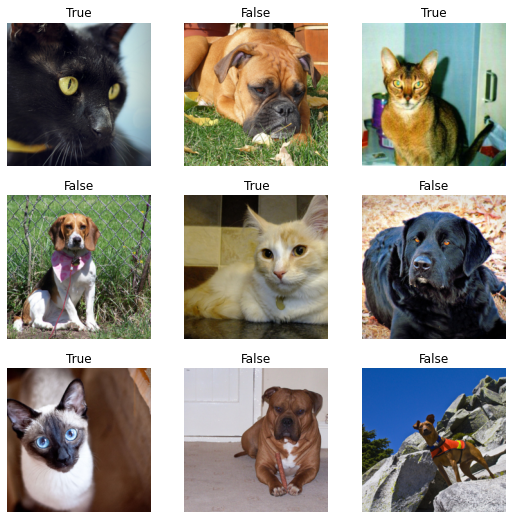

In [20]:
# Let's look at the training batch:
dls.train.show_batch()

## 2.2 Vision Tutorial - *from_path_func*

As I mentioned above, I could have used a different ImageDataLoaders function to create a DataLoaders object containing the pet images. Here we'll use the ImageDataLoader.from_path_func and define a new label function.

Below is an image of a cat, T/F?: True


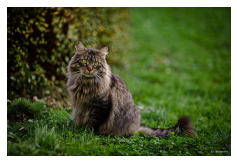

In [181]:
# label function:
def label_func2(f): return f.name[0].isupper()

im = PILImage.create(files[100])
im.show(figsize=(4,4))
print("Below is an image of a cat, T/F?:",label_func2(files[100]))

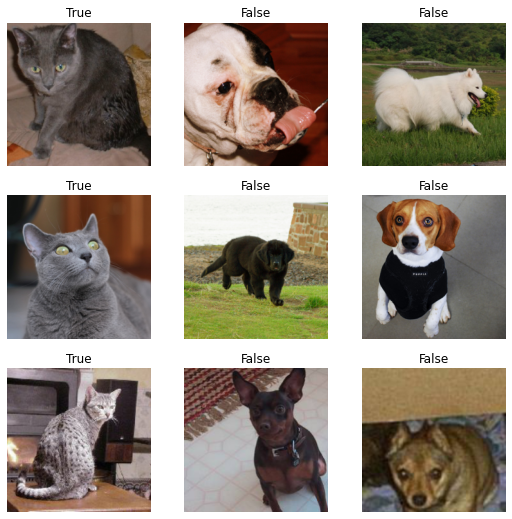

In [24]:
dls2 = ImageDataLoaders.from_path_func(path, files, label_func2, item_tfms=Resize(224))
dls2.show_batch()

## 2.3 Vision Tutorial - *DataBlocks*

Datablocks can be used to gather the data before it is passed to a dataloader. You can think of datablocks as a blue print or recipe that tells you how to assemble the data it will everytually be passed. This setup is a little less user friendly but I wanted to try get to grisps with it in case I want to use it in the future.

Below is an image of a dog


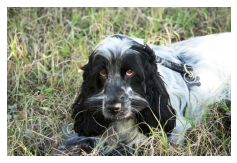

In [187]:
def label_func3(f): return "cat" if f.name[0].isupper() else "dog"

im = PILImage.create(files[373])
im.show(figsize=(4,4))
print("Below is an image of a",label_func3(files[373]))

In [26]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(),
                get_y=label_func3,
                item_tfms=Resize(224))

* ImageBlock states what data type the independent variables are (images in this case).
* CategoryBlock states what data type the dependent variable is (categorical variable in this case).
* get_items provides the data (a folder of images file names in this case).
* splitter defines how the validation set is created. 
* get_y defines the target variable that should be used (the label function)
* item_tfms defines how each image is transformed (224 x 224 pixels).

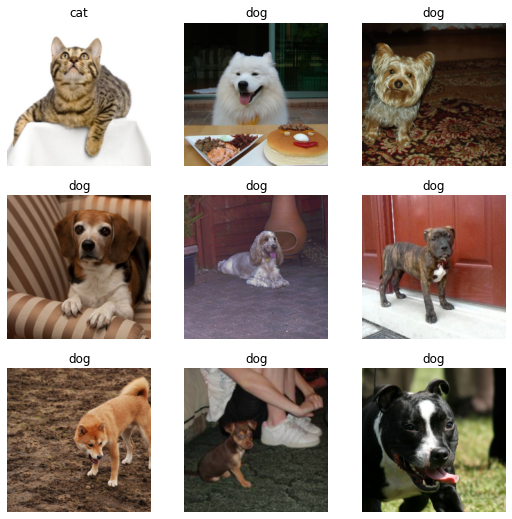

In [28]:
dls3 = pets.dataloaders(path/"images")
dls3.show_batch()

# 3. Fastai Lesson One

## 3.1 The first model

The first model is run roughly half way into the first lesson. Everything spoken about prior to that point is extremely useful and insightful but it is at this halfway point that I felt that I needed my AWS notebook instance up and running. Thus I'm going to start from that stage in this script.

In [185]:
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, 
                                      seed=42, label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch     train_loss  valid_loss  error_rate  time    
0         0.376693    0.240782    0.112991    01:05     
epoch     train_loss  valid_loss  error_rate  time    
0         0.246106    0.195579    0.078484    01:32     
1         0.190142    0.171598    0.070027    01:33     
2         0.144727    0.148527    0.058863    01:35     


**Note:** one epoch = one instance of the model looking through every image in the dataset once. 

From the table above, I can see that as the model runs through more epochs the error rate (the proportion of images that were incorrectly identified) reduces. After running through the pets datasets 3 times, this model can tell the difference between an image of a dog and cat with great accuracy after less than 10 minutes run time (and very little knowledge!). This level of performance is not a given, resenet34 is a competition-winning model that has been pretrained on over a million images. Thus, fine-tuning this model on a new, more refined set of images (the act of which is called transfer learning) means I had a great starting point. 

## 3.2 Testing the model

I'm going to test this model to see if it can correctly identify that my dog, Atlas, is in fact a dog (it is were a dog vs. cloud competition I may not be so optimistic). Here is the image of Atlas that I will use:

<img src="images/2021-07-28-lessonone1.JPG" width="300">

In [4]:
from ipywidgets import FileUpload
uploader = FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [201]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000251


Well, well, well. He's not a cat. And the model is pretty certain he isn't. I'm impressed but at the same time scared by the vastness of what I don't know!

# 4. Tips & Tricks

Below is a list of smaller things I learnt over the course of lesson one that I found useful and dont want to forget.

1. Pressing 'H' in command mode brings up a list of all functions available in command mode. 
2. Using '#' in a code cell tells Python that what follows is a comment and so it should be ignored.
3. The kernel for this notebook is shown in the top right hand conrner under the 'Logout' button. 
4. An example of how to check a package's version and location is given below:

``import PIL
print(PIL.__version__)
print(PIL.__file__)``

5. The '-qqq' after an install command keeps a notebook clean. The 'q' essentially stand for 'quiet'. A single 'q' will only show warnings and errors. Two 'q's only shows errors and three 'q's will disable all outputs. 
6. I've used quite a variety of code to show the images in this notebook. One I haven't used but want to remember is the following:

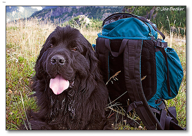

In [202]:
img = PILImage.create(files[1234])
img.to_thumb(192)